# Table of Contents
 <p><div class="lev1"><a href="#Read-Department-of-Education-School-District-Boundaries-file"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Department of Education School District Boundaries file</a></div><div class="lev1"><a href="#Read-geocoded-sales-house-data"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read geocoded sales house data</a></div><div class="lev1"><a href="#Read-School-Attendance-Boundaries"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read School Attendance Boundaries</a></div><div class="lev1"><a href="#Secondary-(high-school)-attendance-zones"><span class="toc-item-num">4&nbsp;&nbsp;</span>Secondary (high school) attendance zones</a></div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# plt.rc("figure", autolayout=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
plot_dataframe = gpd.plotting.plot_dataframe
Point = shapely.geometry.Point

# Read Department of Education School District Boundaries file

In [3]:
tl_2013_55_unsd_elsd_harn = gpd.read_file("Milwaukee_data/tl_2013_55_unsd_elsd_harn/tl_2013_55_unsd_elsd_harn.shp")

A single row looks like this:

In [4]:
tl_2013_55_unsd_elsd_harn.ix[0]

ALAND                                               4.61654e+08
ATH_CO                                                Dairyland
ATH_CO_NO                                                    11
AWATER                                                   325618
CESA_NAME                           Cooperative Ed Serv Agcy 04
CESA_NUM                                                      4
DIST_CODE                                                   485
DIST_NAME                                          Blair-Taylor
ELSDLEA                                                    None
GEOID                                                   5500016
HIGRADE                                                      12
INTPTLAT                                            +44.2900855
INTPTLON                                           -091.1729095
LOGRADE                                                      PK
LSAD                                                         00
MTFCC                                   

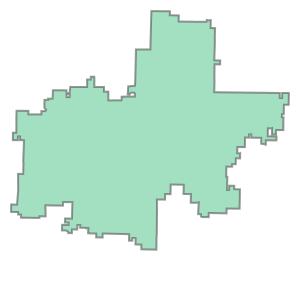

In [5]:
tl_2013_55_unsd_elsd_harn.ix[0,"geometry"]

And we can make a quick map very quickly like this:

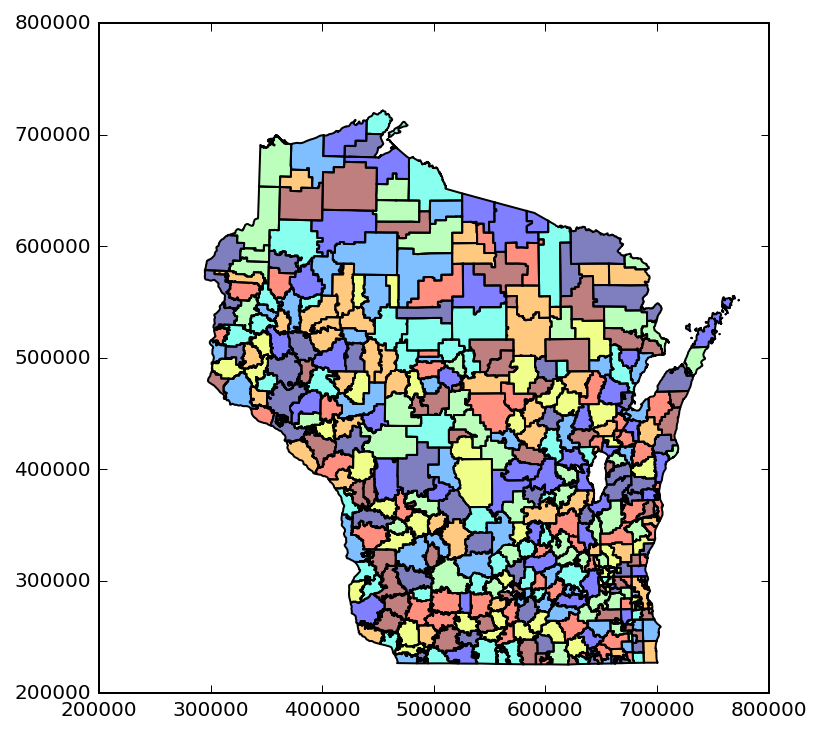

In [6]:
plot_dataframe(tl_2013_55_unsd_elsd_harn)

# Read geocoded sales house data

Import some house locations, and try to get them on that map.

In [8]:
geocoded_ls = []
crs = tl_2013_55_unsd_elsd_harn.crs
for year in (2014, 2015, 2016):
    for district in range(1,15+1):
        geocoded_pd=pd.read_csv("Milwaukee_data/geocoded/%d_RVS_Dist%d_geocoded.csv" % (year, district))
        geometry = gpd.GeoSeries([Point(xy) for xy in zip(geocoded_pd.lng, geocoded_pd.lat)], crs={"proj":"latlong", "datum":"WGS84"})
        geometry = geometry.to_crs(crs)
        n = len(geometry)
        geocoded_pd = gpd.GeoDataFrame(geocoded_pd, geometry=geometry)
        geocoded_pd["year"] = year
        geocoded_pd["district"] = district
        geocoded_ls.append(geocoded_pd)

In [9]:
geocoded_concat = pd.concat(geocoded_ls)

(270000.0, 305000.0)

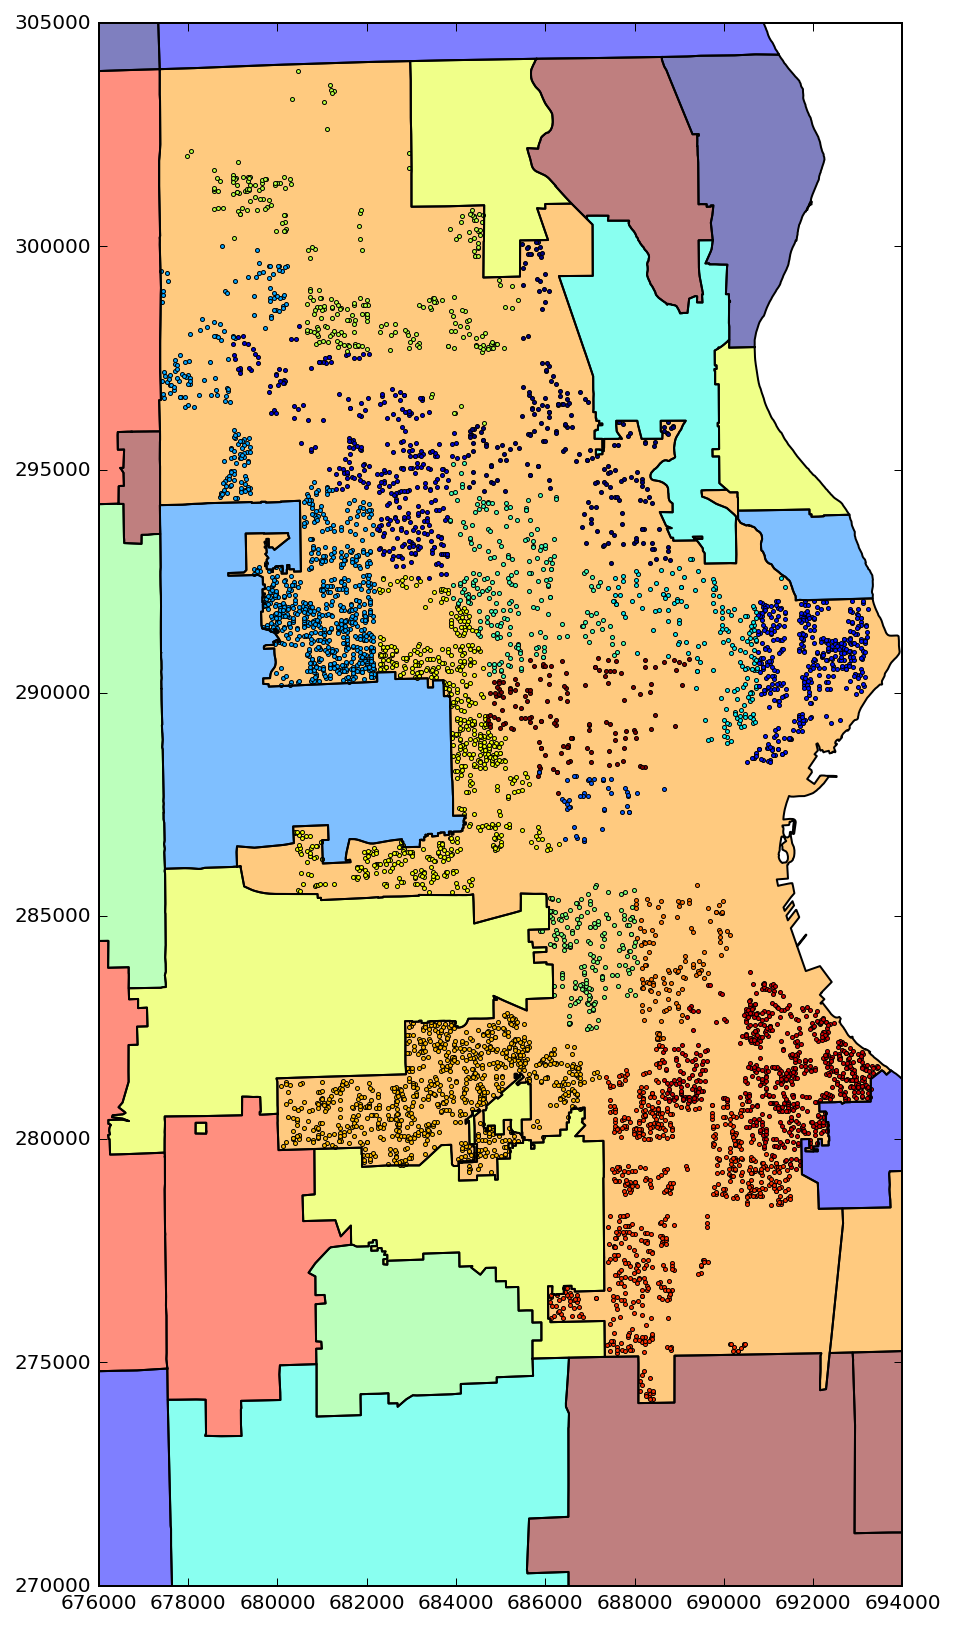

In [10]:
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
ax=plt.gca()
old_xlim = plt.xlim()
old_ylim = plt.ylim()
plot_dataframe(tl_2013_55_unsd_elsd_harn, ax=ax)
plt.xlim(old_xlim)
plt.ylim(old_ylim)

# Read School Attendance Boundaries

In [12]:
SABS_1314 = gpd.read_file("Milwaukee_data/SAA1314/SABS_1314.dbf")

In [13]:
SABS_1314_WI=SABS_1314[SABS_1314.stAbbrev=="WI"].to_crs(crs)

In [14]:
SABS_1314_WI_1=SABS_1314_WI[SABS_1314_WI.sLevel=="1"]
SABS_1314_WI_2=SABS_1314_WI[SABS_1314_WI.sLevel=="2"]
SABS_1314_WI_3=SABS_1314_WI[SABS_1314_WI.sLevel=="3"]
SABS_1314_WI_4=SABS_1314_WI[SABS_1314_WI.sLevel=="4"]

(270000.0, 305000.0)

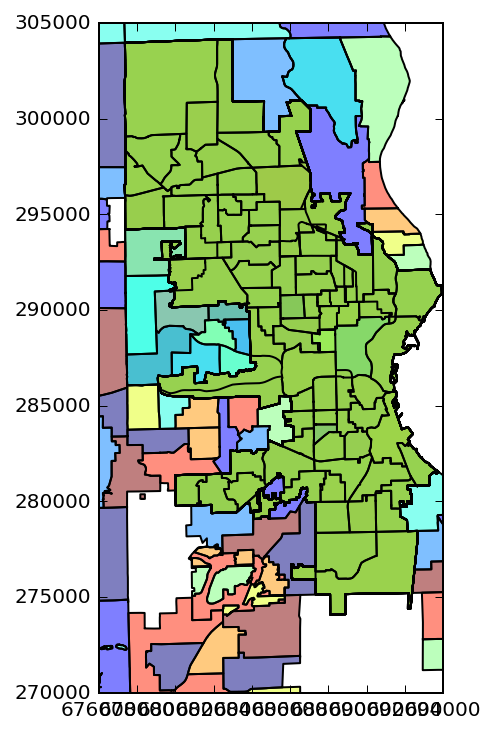

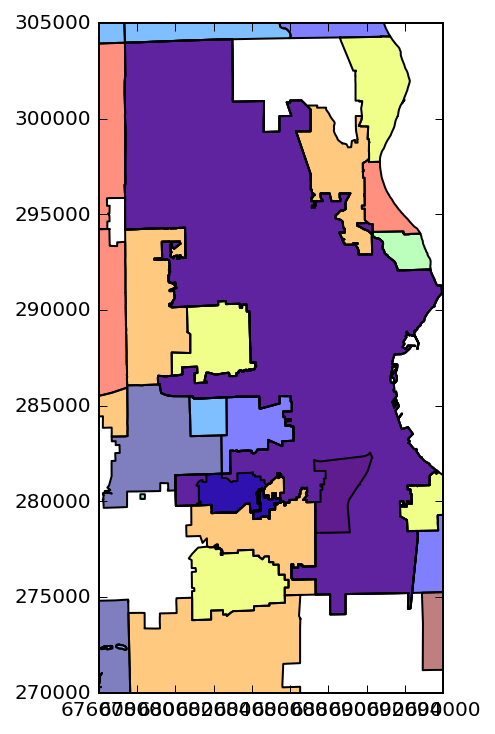

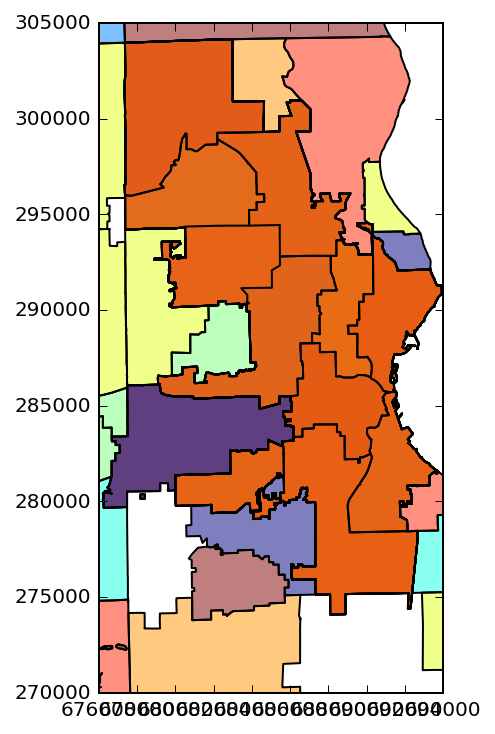

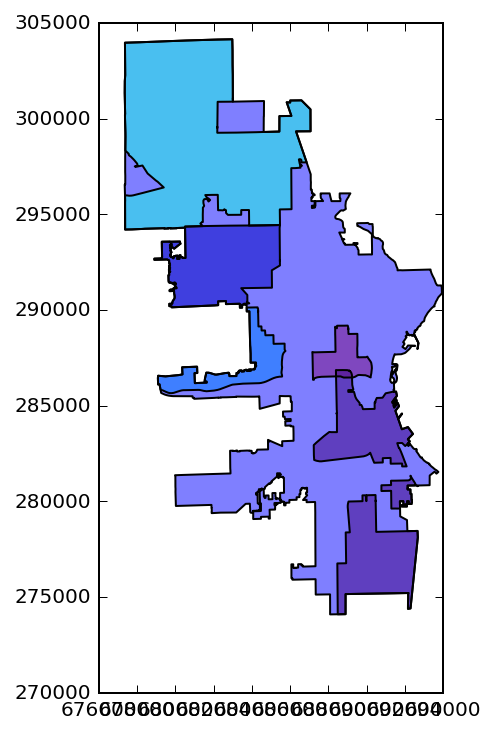

In [15]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plot_dataframe(SABS_1314_WI_1)
plt.xlim(old_xlim)
plt.ylim(old_ylim)
plot_dataframe(SABS_1314_WI_2)
plt.xlim(old_xlim)
plt.ylim(old_ylim)
plot_dataframe(SABS_1314_WI_3)
plt.xlim(old_xlim)
plt.ylim(old_ylim)
plot_dataframe(SABS_1314_WI_4)
plt.xlim(old_xlim)
plt.ylim(old_ylim)

(270000.0, 305000.0)

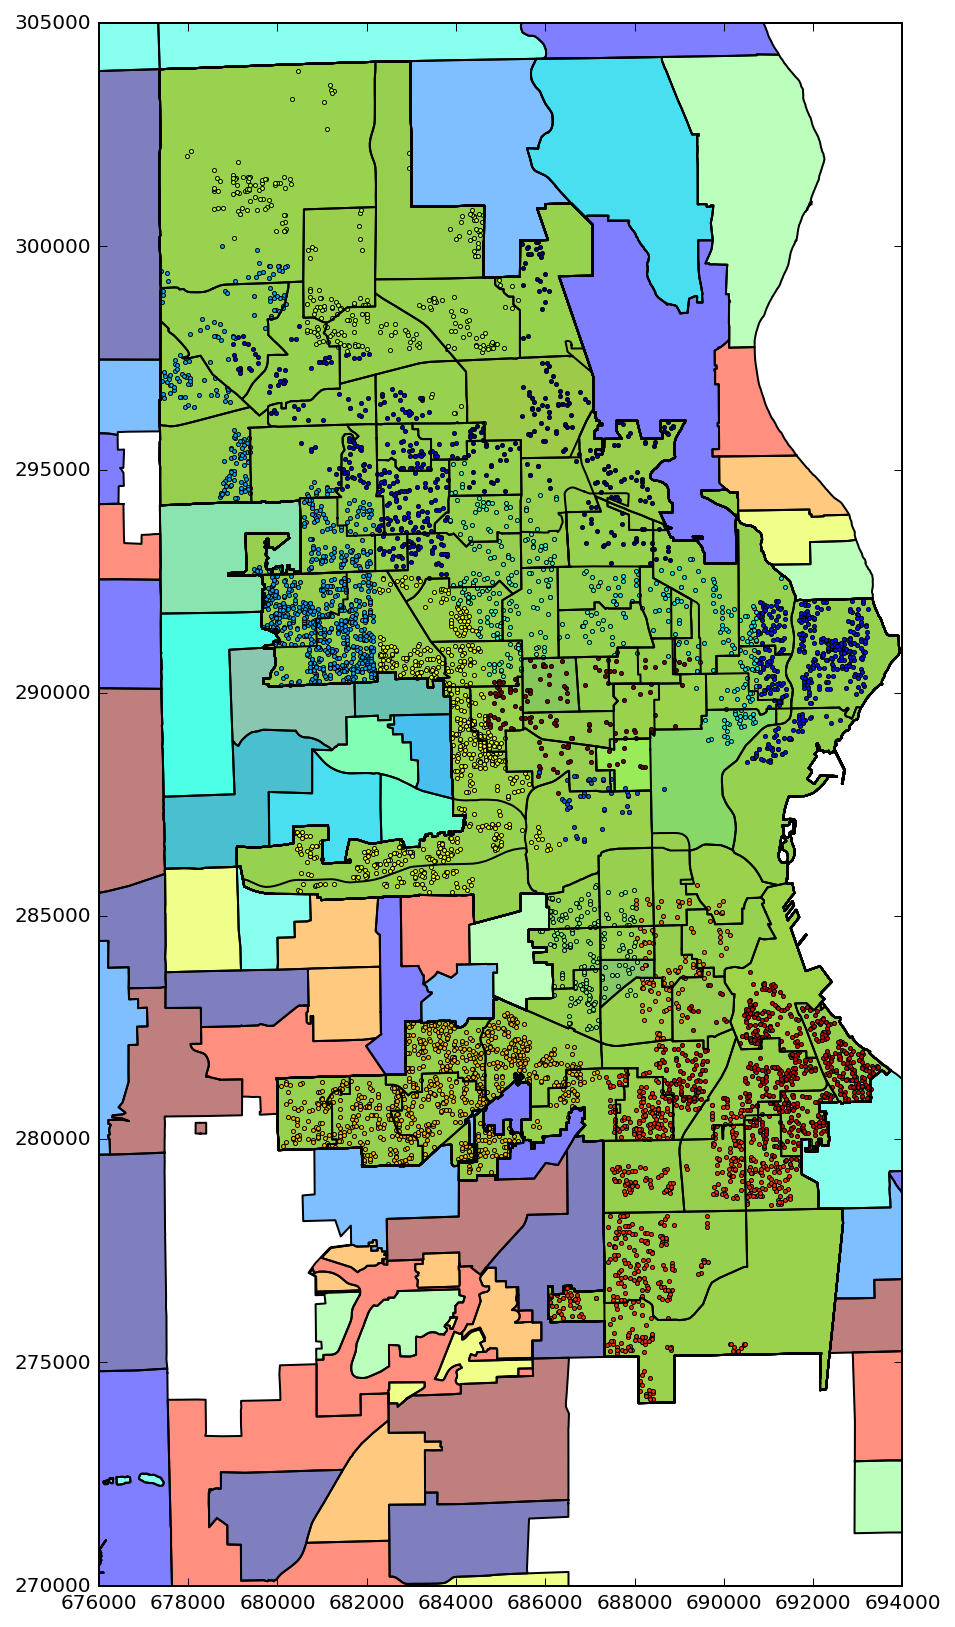

In [16]:
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
ax=plt.gca()
old_xlim = plt.xlim()
old_ylim = plt.ylim()
plot_dataframe(SABS_1314_WI_1, ax=ax)
plt.xlim(old_xlim)
plt.ylim(old_ylim)

(270000.0, 305000.0)

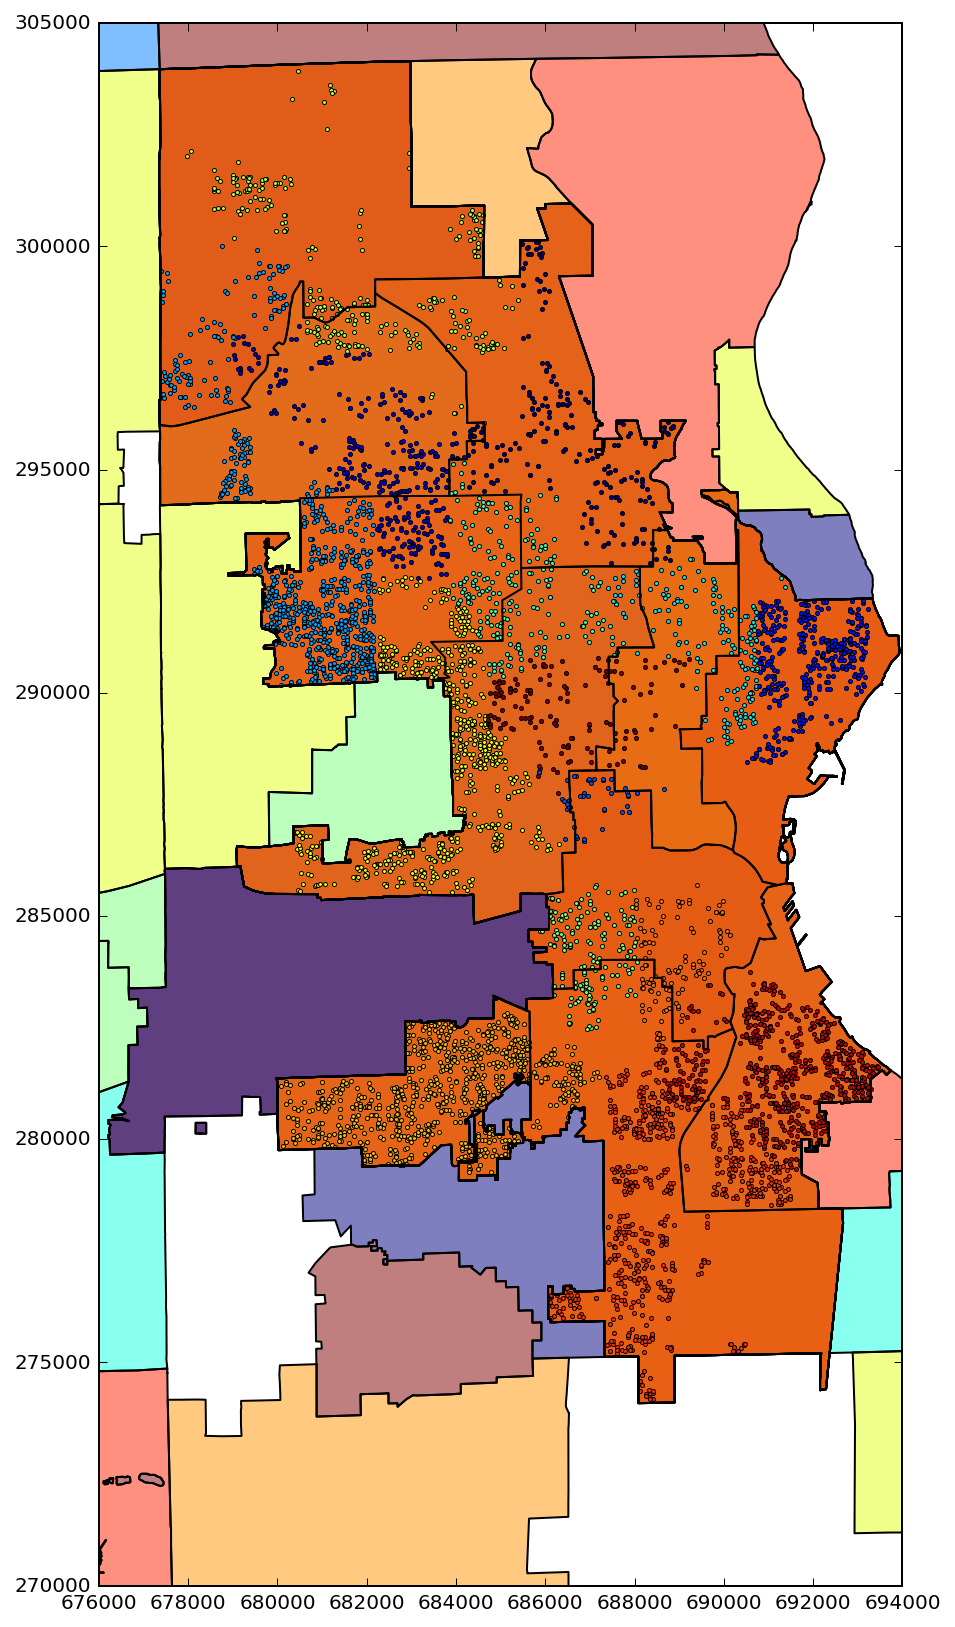

In [17]:
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
ax=plt.gca()
old_xlim = plt.xlim()
old_ylim = plt.ylim()
plot_dataframe(SABS_1314_WI_3, ax=ax)
plt.xlim(old_xlim)
plt.ylim(old_ylim)

In [18]:
any([("M" in s) for s in tl_2013_55_unsd_elsd_harn.CESA_NAME.values])

False

Let's hone in on Milwaukee. First select school districts with the word "Milwaukee" in them.

In [19]:
milwaukee_districts=tl_2013_55_unsd_elsd_harn[
    ["milwaukee" in s.lower() 
        for s in tl_2013_55_unsd_elsd_harn.DIST_NAME.values
    ]]
milwaukee_districts

,ALAND,ATH_CO,ATH_CO_NO,AWATER,CESA_NAME,CESA_NUM,DIST_CODE,DIST_NAME,ELSDLEA,GEOID,...,LOGRADE,LSAD,MTFCC,NAME,NCES_CODE,STATEFP,Shape_Area,Shape_Leng,UNSDLEA,geometry
204,248809321.0,Milwaukee City,27,1670089.0,Cooperative Ed Serv Agcy 01,1,3619,Milwaukee,None,5509600,...,PK,00,G5420,Milwaukee School District,5509600,55,2.504118e+08,179048.068118,09600,"POLYGON ((682973.2373516741 304150.6750027966,..."
305,12428175.0,Woodland,47,19701.0,Cooperative Ed Serv Agcy 01,1,5439,South Milwaukee,None,5514040,...,PK,00,G5420,South Milwaukee School District,5514040,55,1.244725e+07,15039.996713,14040,"POLYGON ((695686.8080348271 271192.8620664552,..."
347,35871205.0,Greater Metro,17,61582.0,Cooperative Ed Serv Agcy 01,1,6300,West Allis-West Milwaukee,None,5516260,...,PK,00,G5420,West Allis School District,5516260,55,3.592687e+07,39352.015395,16260,"(POLYGON ((678404.130269361 280172.6997791771,..."


The Milwaukee School District is the first one in the list. We store its geometry object (polygon) under the variable name `MSD`.

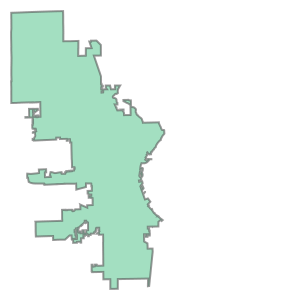

In [20]:
MSD=milwaukee_districts.iloc[0].geometry
MSD

It's now very easy to select school attendance zones that fall within the MSD, like so:

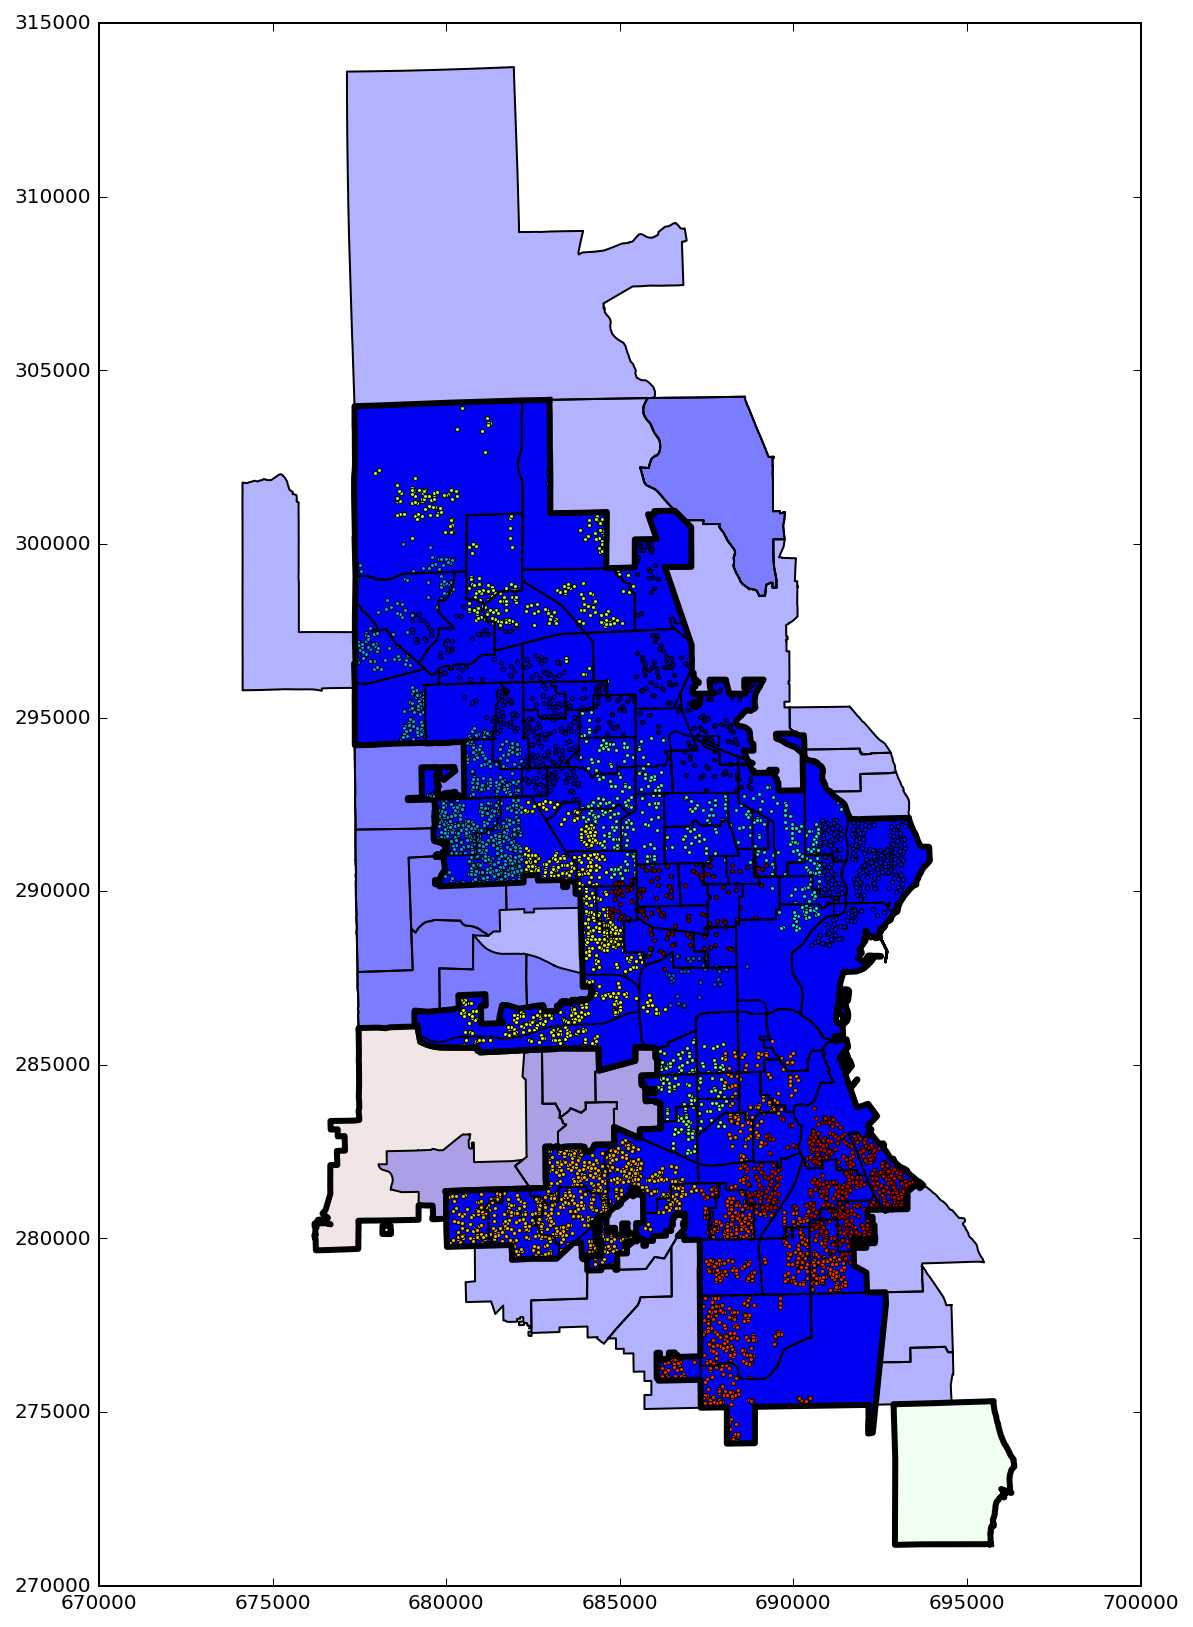

In [52]:
milwaukee_attendances_1 = SABS_1314_WI_1[SABS_1314_WI_1.intersects(MSD)]
milwaukee_attendances_3 = SABS_1314_WI_3[SABS_1314_WI_3.intersects(MSD)]
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
plot_dataframe(milwaukee_attendances_1, color="blue", alpha=0.3, ax=plt.gca())
plot_dataframe(milwaukee_districts, ax=plt.gca(), alpha=0.1, linewidth=3)

Remove attendance zones that are huge:

In [55]:
milwaukee_attendances_1 = milwaukee_attendances_1[milwaukee_attendances_1.Shape_Area<1e8]
milwaukee_attendances_3 = milwaukee_attendances_3[milwaukee_attendances_3.Shape_Area<1e8]

Remove school that allow open-enroll.

In [56]:
milwaukee_attendances_1 = milwaukee_attendances_1[milwaukee_attendances_1.openEnroll=="0"]
milwaukee_attendances_3 = milwaukee_attendances_3[milwaukee_attendances_3.openEnroll=="0"]

To work out which elementary school this house belongs to, we use the `contains` method of the school boundaries:

In [38]:
house=geocoded_concat.iloc[0]

In [39]:
milwaukee_attendances_1[milwaukee_attendances_1.contains(house.geometry)]

,MultiBdy,Shape_Area,Shape_Leng,SrcName,defacto,geometry,gshi,gslo,leaid,ncessch,openEnroll,sLevel,schnam,stAbbrev,updateDate
69532,0,928046.860328,4830.166029,Browning,No,"POLYGON ((684636.1912867291 296055.0755560715,...",05,PK,5509600,550960001132,0,1,BROWNING ELEMENTARY,WI,2014-05-27


And so this house is in the attendance zone of Browning Elementary. But some houses are in multiple attendance zones:

In [40]:
milwaukee_attendances_1[milwaukee_attendances_1.contains(geocoded_concat.iloc[1].geometry)]

,MultiBdy,Shape_Area,Shape_Leng,SrcName,defacto,geometry,gshi,gslo,leaid,ncessch,openEnroll,sLevel,schnam,stAbbrev,updateDate
69557,1,4.368205e+06,10886.321197,Franklin,No,"POLYGON ((686881.4075895599 294505.3772237506,...",08,PK,5509600,550960001165,0,1,FRANKLIN ELEMENTARY,WI,2014-05-27
69560,0,2.425682e+06,6688.790325,Lloyd Barbee,No,"POLYGON ((686575.9917755838 292824.3084179889,...",06,PK,5509600,550960001170,0,1,BARBEE ELEMENTARY,WI,2014-05-27


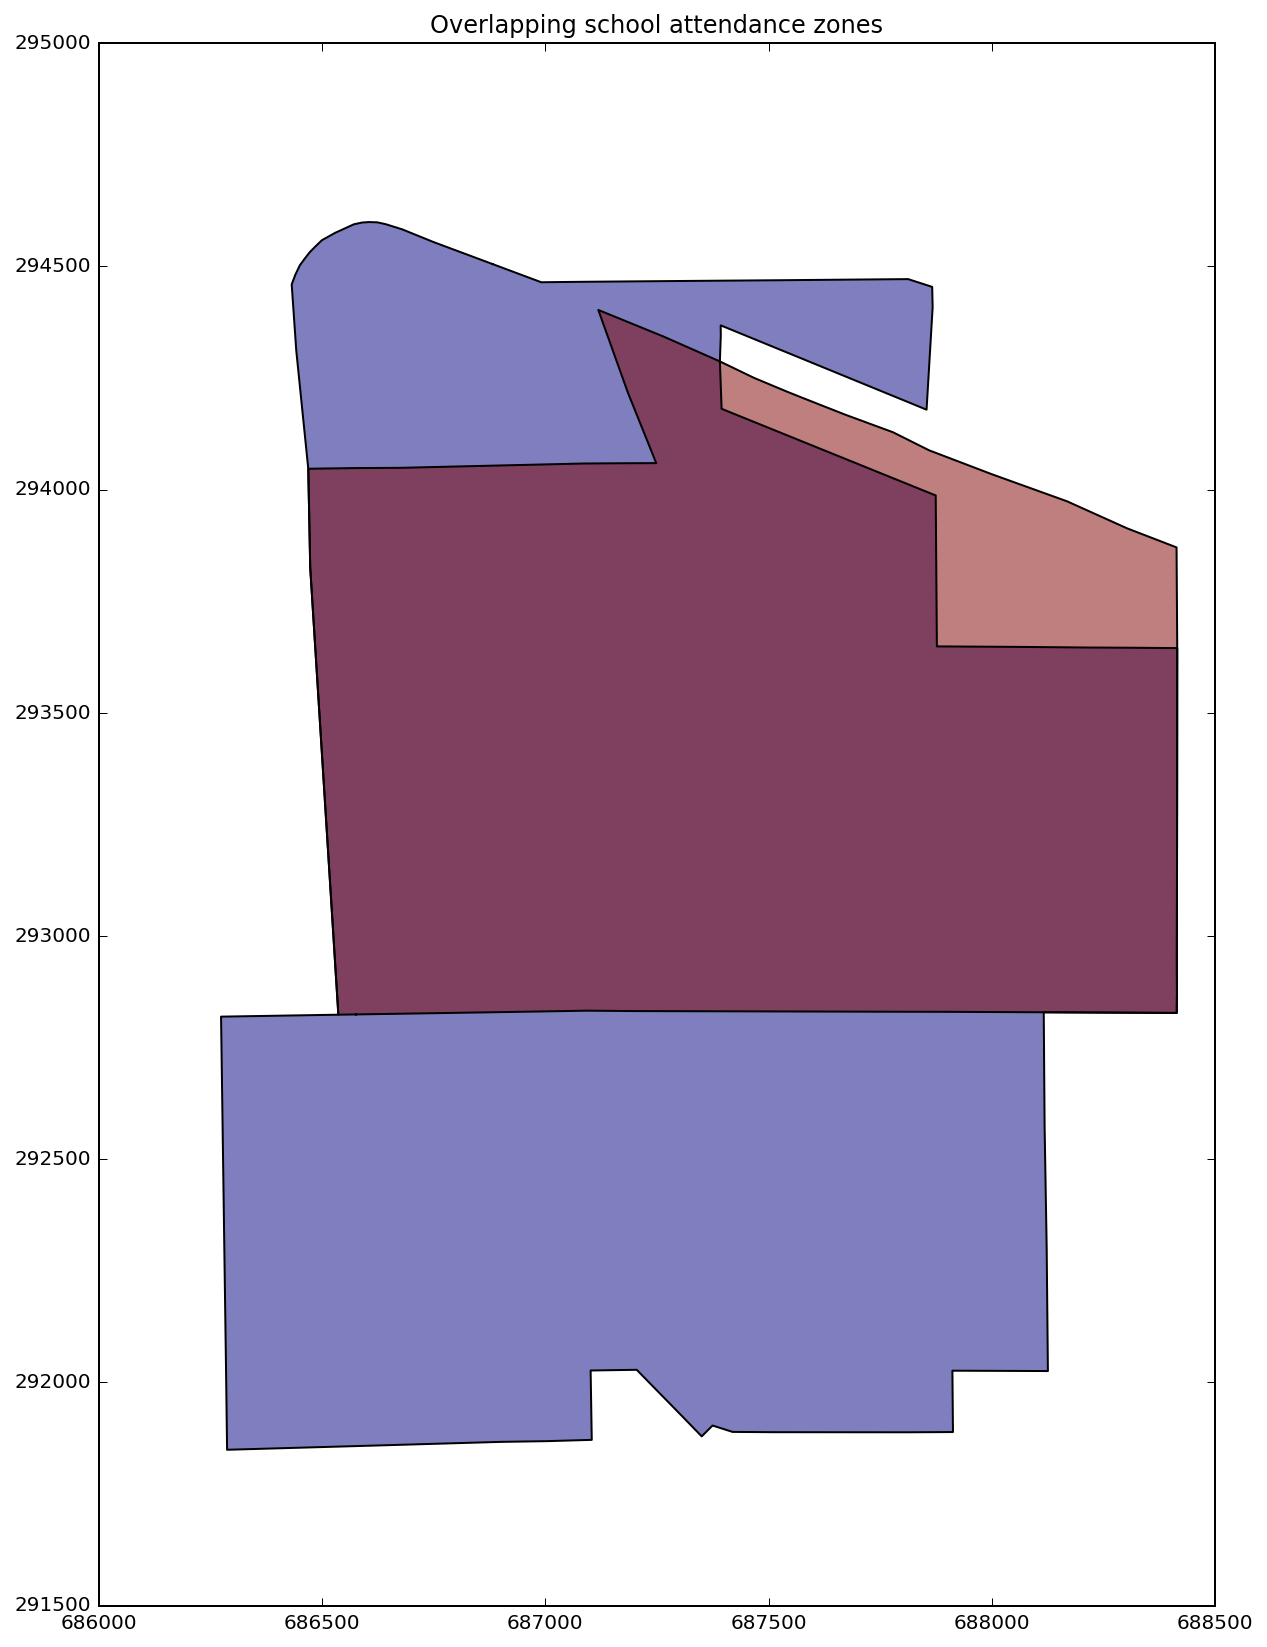

In [51]:
plot_dataframe(milwaukee_attendances_1[milwaukee_attendances_1.contains(geocoded_concat.iloc[1].geometry)])
plt.title("Overlapping school attendance zones")

In [42]:
def get_ind(zones, point):
    ind=np.where(zones.contains(point))[0]
    if len(ind)==0:
        return None
    elif len(ind)>1:
        return None#np.argmin(zones.iloc[ind].area)
    return ind[0]

In [43]:
iattendance=[get_ind(milwaukee_attendances_1, house) for house in geocoded_concat.geometry]

In [44]:
sum([i is None for i in iattendance])

735

In [45]:
len(iattendance)

5675

# Secondary (high school) attendance zones

Elementary attendance zones aren't really working for us, there's too much overlap. Before we give up, let's look at high school attendance zones instead.

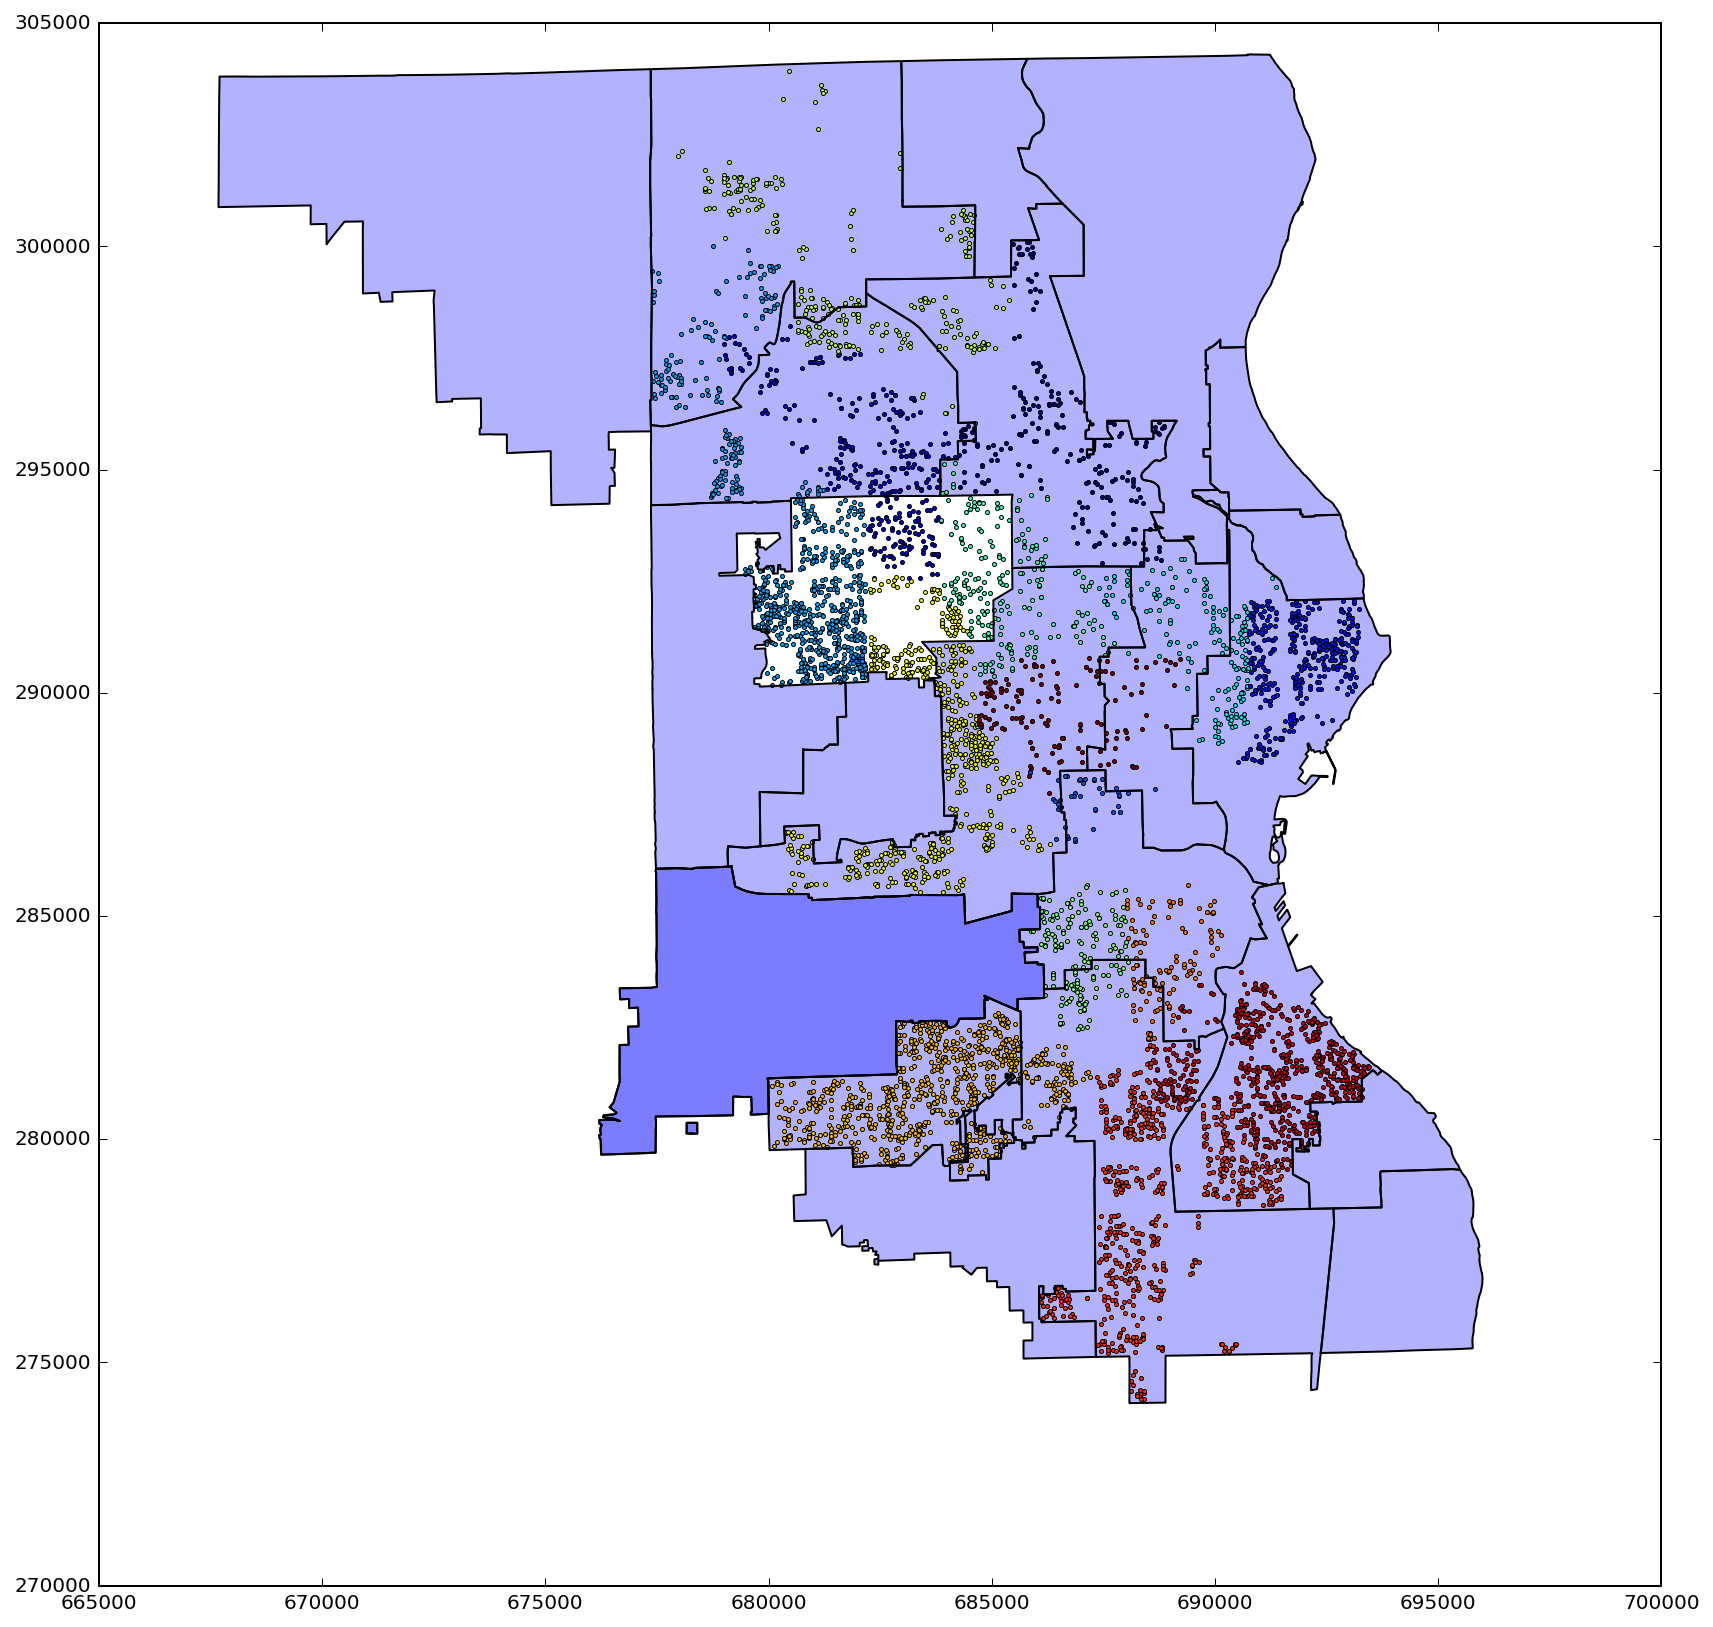

In [58]:
plot_dataframe(geocoded_concat, column="district", figsize=(14.0, 14.0))
plot_dataframe(milwaukee_attendances_3, color="blue", alpha=0.3, ax=plt.gca())
# plot_dataframe(milwaukee_districts, ax=plt.gca(), alpha=0.1, linewidth=3)

Now we have the opposite problem, as there is an area which contains no school attendance zone (remember we filtered out large zones and school that allow open-enroll).

In [57]:
milwaukee_attendances_3[milwaukee_attendances_3.contains(house.geometry)]

,MultiBdy,Shape_Area,Shape_Leng,SrcName,defacto,geometry,gshi,gslo,leaid,ncessch,openEnroll,sLevel,schnam,stAbbrev,updateDate
69544,0,2.490903e+07,35344.533845,16,No,"POLYGON ((686657.741873416 300887.9769169604, ...",12,09,5509600,550960001147,0,3,CAREER AND TECHNICAL EDUCATION,WI,2014-05-27
